In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')

Форма массива X: (26, 2)


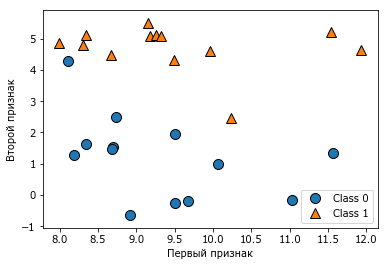

In [25]:
#генерирум набор данных
X, y = mglearn.datasets.make_forge()
#строим график для набора данных
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива X: {}".format(X.shape))

Text(0, 0.5, 'Целевая переменная')

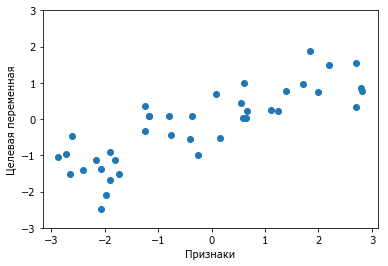

In [36]:
#пример регрессии
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Признаки')
plt.ylabel('Целевая переменная')

In [60]:
#Данные раковых опухлей молочной железы
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer['data'].shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
<class 'numpy.ndarray'>


In [57]:
# Количество доброкачественных (benign) и злокачественных (malignant) опухолей
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

{'malignant': 212, 'benign': 357}


In [72]:
#Данные районов продажи домов в Бостоне
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [73]:
# Производные признаки для Бостонского набора данных, которые включает дополнительные значения
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


In [87]:
# Пример К ближайших соседей
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
# устанавливаем значение 3ёх ближайших точек
k_means = KNeighborsClassifier(n_neighbors=3)
k_means.fit(X_train, y_train)

# прогнозы на тестовом наборе данных
k_means.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [94]:
# Правильность на тестовом наборе
print("{:.2f}".format(k_means.score(X_test, y_test)))

0.86


# Анализ работы KNeighborsClassifier

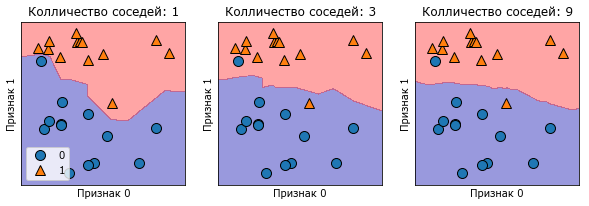

In [103]:
# Проверка на 1, 3, 9 ближайших соседей
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    k_means = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(k_means, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Колличество соседей: {}".format(n_neighbors))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend(loc=3)

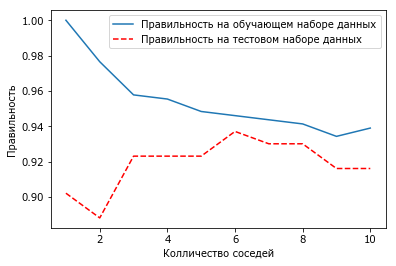

In [113]:
#здесь мы берем набор данных опухлей молочной железы и использум K'ближайших
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #строим модель
    k_means = KNeighborsClassifier(n_neighbors = n_neighbors)
    k_means.fit(X_train, y_train)
    #записываем правильность на обучающем наборе
    training_accuracy.append(k_means.score(X_train, y_train))
    #записываем правильность на тестовом наборе
    test_accuracy.append(k_means.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Правильность на обучающем наборе данных")
plt.plot(neighbors_settings, test_accuracy, label="Правильность на тестовом наборе данных", linestyle='dashed', color='red')
plt.ylabel('Правильность')
plt.xlabel('Колличество соседей')
plt.legend()

# Регрессия k ближайших соседей

In [116]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#создаём экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors = 3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [117]:
print('Прогнозы для тестового набора:\n{}'.format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [118]:
print('R^2 на тестовом наборе данных: {:.2f}'.format(reg.score(X_test, y_test)))

R^2 на тестовом наборе данных: 0.83


### Анализ модели KNeighborsRegressor

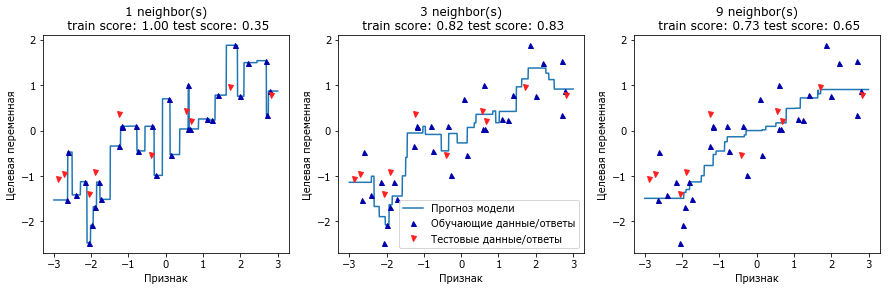

In [135]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
# создаём 1000 точек данных равномерной распределний
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    # получаем прогнозы используя 1, 3, 9 соседей
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=5)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=5)    
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Признак')
    ax.set_ylabel('Целевая переменная')

axes[1].legend(["Прогноз модели","Обучающие данные/ответы", "Тестовые данные/ответы"], loc="lower right")

# Линейные модели